
Nama : Ramadhani Samudra Gawang Indiyanto
Email Dicoding : ganar.gatul@gmail.com

In [87]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-10 11:26:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.13MB/s    in 15s     

2021-04-10 11:27:15 (20.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [88]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
# base_dir = '/tmp/rockpaperscissors'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'val')





In [77]:
os.listdir("/tmp/rockpaperscissors")

['scissors', 'rock', 'README_rpc-cv-images.txt', 'rps-cv-images', 'paper']

In [78]:
os.listdir("/tmp/rockpaperscissors/rps-cv-images")

['scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest')

In [92]:

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

train_generator = train_datagen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        subset = 'training',
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        subset = 'validation',
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [93]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [94]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [95]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 7s - loss: 1.1468 - accuracy: 0.3400 - val_loss: 1.0839 - val_accuracy: 0.3500
Epoch 2/20
25/25 - 6s - loss: 1.0862 - accuracy: 0.4400 - val_loss: 1.1340 - val_accuracy: 0.3000
Epoch 3/20
25/25 - 6s - loss: 1.0703 - accuracy: 0.4100 - val_loss: 1.2583 - val_accuracy: 0.3000
Epoch 4/20
25/25 - 6s - loss: 1.1106 - accuracy: 0.3700 - val_loss: 1.1296 - val_accuracy: 0.4000
Epoch 5/20
25/25 - 6s - loss: 1.1024 - accuracy: 0.3100 - val_loss: 1.0453 - val_accuracy: 0.4500
Epoch 6/20
25/25 - 6s - loss: 1.0886 - accuracy: 0.3600 - val_loss: 1.0710 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 6s - loss: 1.0544 - accuracy: 0.4300 - val_loss: 0.8852 - val_accuracy: 0.8000
Epoch 8/20
25/25 - 6s - loss: 0.9006 - accuracy: 0.5400 - val_loss: 0.8321 - val_accuracy: 0.7500
Epoch 9/20
25/25 - 6s - loss: 0.6892 - accuracy: 0.7000 - val_loss: 1.4599 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 6s - loss: 0.4244 - accuracy: 0.8900 - val_loss: 0.1826 - val_accuracy: 0.9500
Epoch 11/20
25/25 -

Saving bn7yju6XvU87slzH.png to bn7yju6XvU87slzH.png
bn7yju6XvU87slzH.png
[[0. 0. 1.]]
0.0
0.0
1.0
scissors


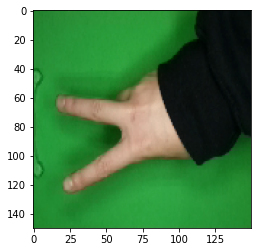

In [96]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)
  
  print(fn)
  print(classes)
  print(classes[0,0])
  print(classes[0,1])
  print(classes[0,2])
  if classes[0, 0] == 1:
    print('paper')
  elif classes[0, 1] == 1:
    print('rock')
  elif classes[0, 2] == 1:
    print('scissors')